# Evaluation of Segmented Linear Regression

---

### Import Libraries

In [1]:
import sys
import os
root = os.path.abspath('..')  
sys.path.append(root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from piecewise_regression import r_squared_calc


from modules import load, plots, analysis, utils

# styles
plt.style.use('seaborn-v0_8-white')

---

### Load data

In [2]:
# Inputs
#name = 'AW1D_YSI_20230826'
#name = 'AW2D_YSI_20230815'
#name = 'AW5D_YSI_20230824'
#name = 'AW6D_YSI_20230815'
#name = 'AW7D_YSI_20230814'
#name = 'BW1D_YSI_20230824'
#name = 'BW2D_YSI_20230819'
#name = 'BW3D_YSI_20230818'
#name = 'BW4D_YSI_20230816'
name = 'BW5D_YSI_20230822'
#name = 'BW6D_YSI_20230826'
#name = 'BW7D_YSI_20230826'
#name = 'BW8D_YSI_20230823'
#name = 'BW9D_YSI_20230823'
#name = 'BW10D_YSI_20230825'
#name = 'BW11D_YSI_20230823'
#name = 'LRS33D_YSI_20230822'
#name = 'LRS69D_YSI_20230818'
## name = 'LRS70D_YSI_20230822'  por qué best BIC es cero?
## name = 'LRS75D_YSI_20230819'
#name = 'LRS79D_YSI_20230827'
#name = 'LRS81D_YSI_20230823'
#name = 'LRS89D_YSI_20230825'
#name = 'LRS90D_YSI_20230827'

In [3]:
path_json = f'../data/results/{name}_results.json'

df = load.load_data(filepath=path_json, json=True)
df


,trial_1,trial_2,trial_3,trial_4,trial_5
df,"{'bic': {'0': 93804.3535159611, '1': 89367.769...","{'bic': {'0': 93804.3535159611, '1': 89367.769...","{'bic': {'0': 93804.3535159611, '1': 89367.769...","{'bic': {'0': 93804.3535159611, '1': 89367.769...","{'bic': {'0': 93804.3535159611, '1': 89367.769..."
best_n_breakpoint_bic,2,2,2,2,2
min_bic_n_breakpoint,10,10,9,10,10
best_n_breakpoint_rss,2,2,2,2,2


In [4]:
path_processed = f'../data/processed/{name}_processed.csv'

x_processed, y_processed = load.load_data(filepath=path_processed, 
                            x_col='Vertical Position [m]',
                            y_col='Corrected sp Cond [uS/cm]'
                            )

---

### Optimal `n_breakpoint`

In [5]:
trial = analysis.select_best_trial(path_json)

trial_select = df[trial[0]]
#N_BREAKPOINT = df.loc['best_n_breakpoint_bic'].mode().iloc[0] # alternative, select 'best_n_breakpoint_rss'
N_BREAKPOINT = 7

In [6]:
# Elbow plot

x_values = np.array(list(trial_select['df']['n_breakpoints'].values()))
y_values = np.array(list(trial_select['df']['bic'].values()))
secondary_x = np.array(list(trial_select['df']['n_breakpoints'].values()))
secondary_y = np.array(list(trial_select['df']['rss'].values()))

plots.plot_data(
    x_values=x_values,
    y_values=y_values,
    plot_mode='lines+markers',
    x_axis_label="Number Breakpoints",
    y_axis_label="BIC",
    secondary_x=secondary_x,
    secondary_y=secondary_y,
    use_secondary_axis=True,
    y2_axis_label="RSS",
    trace_names=['BIC', 'RSS'],
    title=f"Elbow Plot: <b>{name}<b>",
)

---

### Evaluation

In [7]:
# Params
params_ms = utils.get_breakpoint_data(trial_select['df'], N_BREAKPOINT)
params_ms

{'bic': 58073.34897172,
 'n_breakpoints': 7,
 'estimates': {'const': {'estimate': 1316.122606913,
   'se': 44.3882549631,
   'confidence_interval': [1229.1026985828, 1403.1425152432],
   't_stat': 29.6502443723,
   'p_t': 1.816158679e-178},
  'beta1': {'estimate': -4713.8543936587,
   'se': 102.3318300668,
   'confidence_interval': [-4914.4684182264, -4513.240369091],
   't_stat': -46.064400398,
   'p_t': '-'},
  'breakpoint1': {'estimate': 0.8584455781,
   'se': 0.0127817975,
   'confidence_interval': [0.8333878044, 0.8835033517],
   't_stat': '-',
   'p_t': '-'},
  'beta2': {'estimate': 583.237911234,
   'se': 16.0498695641,
   'confidence_interval': [551.7733226994, 614.7024997687],
   't_stat': 36.3391059911,
   'p_t': '-'},
  'breakpoint2': {'estimate': 4.7631699822,
   'se': 0.058402234500000004,
   'confidence_interval': [4.648676698, 4.8776632664],
   't_stat': '-',
   'p_t': '-'},
  'beta3': {'estimate': 1017.6414304604,
   'se': 14.4277895606,
   'confidence_interval': [989.3

In [8]:
# Model Select
ms = utils.rebuild_model(x_processed,y_processed,params_ms)
ms

In [9]:
# Globals
RSS, TSS, R2, R2_ajus = r_squared_calc.get_r_squared(y_processed, 
                                                    ms.predict(x_processed), 
                                                    len(ms.get_params()))


print("RSS: ", RSS)
print("TSS: ", TSS)
print("R2: ", R2)
print("R2_ajus: ", R2_ajus)

RSS:  398235322.9723866
TSS:  2401800866773.062
R2:  0.9998341930305373
R2_ajus:  0.999833416113851


In [10]:
# Per segment
metric_per_segment = analysis.calculate_metrics_per_segment(ms)
metric_per_segment

[{'Segment': 1,
  'R^2': np.float64(0.96984127720464),
  'RMS%': np.float64(9.002753605900123),
  'RMS% (min-max)': np.float64(5.718923679325165)},
 {'Segment': 2,
  'R^2': np.float64(0.2946583162751588),
  'RMS%': np.float64(1.4620682688607314),
  'RMS% (min-max)': np.float64(18.20591678165512)},
 {'Segment': 3,
  'R^2': np.float64(0.8849284235125511),
  'RMS%': np.float64(3.3591427265532943),
  'RMS% (min-max)': np.float64(10.477090326069236)},
 {'Segment': 4,
  'R^2': np.float64(0.9745032366015407),
  'RMS%': np.float64(3.0729962600924163),
  'RMS% (min-max)': np.float64(4.5312577410973995)},
 {'Segment': 5,
  'R^2': np.float64(0.9837395256436943),
  'RMS%': np.float64(2.9480355005657186),
  'RMS% (min-max)': np.float64(3.953548261695468)},
 {'Segment': 6,
  'R^2': np.float64(0.9928408453776775),
  'RMS%': np.float64(1.0719421002863954),
  'RMS% (min-max)': np.float64(2.501830290324984)},
 {'Segment': 7,
  'R^2': np.float64(0.9422974525992251),
  'RMS%': np.float64(0.447943116808299

In [11]:
# Breakpoints
breakpoints = analysis.extract_breakpoints(ms)
breakpoints

,Breakpoint X Position,Breakpoint Y Position,Confidence Interval (X)
1,0.858446,5407.298905,"(0.8333878044166649, 0.8835033517402902)"
2,4.763170,5610.115637,"(4.648676697987064, 4.877663266361521)"
3,8.099348,7729.186626,"(8.038768337882338, 8.159927146538799)"
4,12.423254,14875.828972,"(12.415518222665629, 12.430990420423658)"
5,13.892297,34035.461175,"(13.881007417444273, 13.903586005486051)"
6,16.513103,51081.920128,"(16.50089262406631, 16.52531394866174)"
7,19.944972,54408.454591,"(19.882389552617273, 20.007554724646152)"


##

---

### Final results

#### General models

In [12]:
# Visualizamos los datos procesados junto con los modelos obtenidos
df_ms = pd.DataFrame({'n_breakpoints': trial_select['df']['n_breakpoints'], 
                    'estimates': trial_select['df']['estimates']})

plots.interactive_segmented_regression(x=x_processed, 
                                       y=y_processed, 
                                       df=df_ms, 
                                       title=name,
                                       breakpoints=N_BREAKPOINT)

interactive(children=(IntSlider(value=7, description='n_breakpoints', max=10), Output()), _dom_classes=('widge…

#### Models per segment

In [13]:
segments = utils.extract_segments(ms)   
segments

{'segments': [{'segment': 1,
   'data_x': array([0.001, 0.009, 0.014, 0.019, 0.032, 0.038, 0.043, 0.049, 0.064,
          0.07 , 0.076, 0.09 , 0.096, 0.1  , 0.112, 0.117, 0.12 , 0.129,
          0.133, 0.135, 0.145, 0.15 , 0.154, 0.158, 0.166, 0.168, 0.17 ,
          0.177, 0.18 , 0.183, 0.193, 0.196, 0.199, 0.208, 0.213, 0.214,
          0.218, 0.219, 0.22 , 0.221, 0.224, 0.227, 0.229, 0.232, 0.233,
          0.234, 0.235, 0.236, 0.237, 0.238, 0.239, 0.24 , 0.241, 0.242,
          0.243, 0.244, 0.245, 0.246, 0.247, 0.25 , 0.251, 0.253, 0.258,
          0.265, 0.274, 0.282, 0.284, 0.286, 0.288, 0.289, 0.29 , 0.293,
          0.295, 0.297, 0.298, 0.299, 0.302, 0.308, 0.322, 0.328, 0.332,
          0.346, 0.351, 0.354, 0.367, 0.376, 0.385, 0.402, 0.409, 0.414,
          0.423, 0.44 , 0.448, 0.454, 0.47 , 0.476, 0.478, 0.492, 0.499,
          0.505, 0.512, 0.526, 0.532, 0.54 , 0.553, 0.556, 0.564, 0.57 ,
          0.576, 0.581, 0.585, 0.597, 0.603, 0.607, 0.611, 0.621, 0.626,
          0.

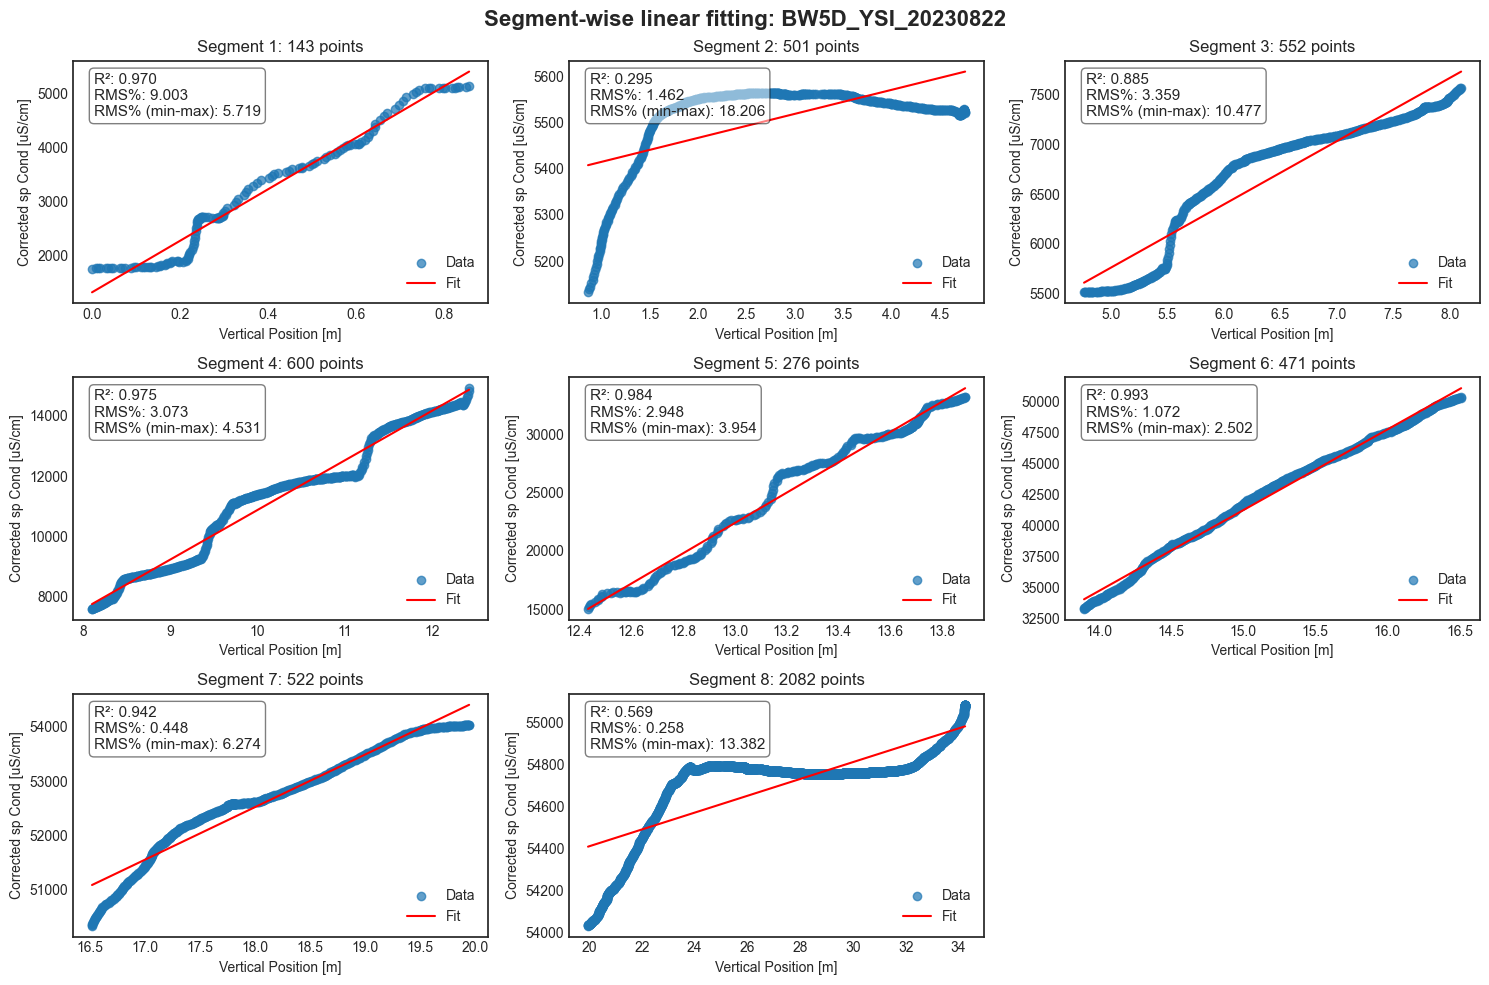

In [19]:
plots.plot_segments(segments, 
                    metric_per_segment, 
                    title=f"Segment-wise linear fitting: {name}")

---

## Other analysis

### 1. Density of points in processed data


In [20]:
width = 1 # meters

density = analysis.calculate_density(x_processed, y_processed, bin_width=width)

In [21]:
# Plot data density
plots.plot_histogram(density,
            value_column='x_bin', 
            weight_column='frequency', 
            num_bins=len(density['x_bin']),
            title=f'Data density histogram (bin width = {width} m) | <b>{name}<b>',
            x_axis_title='Vertical Position [m]',
            bar_color='lightgreen'
            ) 